In [27]:
import importlib
from scripts import forecast_pipeline as fp
from scripts import visuals as vs
importlib.reload(fp)
importlib.reload(vs)

<module 'scripts.visuals' from '/Users/vasilisvc6/Documents/Le grand cormoran project/scripts/visuals.py'>

## Current Date

In [2]:
date = '2024-12-22' # Date in the forecast horizon (2024-12-01 - 2025-02-01)
ped_start = '2024-06-01' # Pedestranization start date
ped_end = '2024-08-30' # Pedestranization end date

## Forecast data pipeline
**This cell fetches, engineers, cleans and reorders all of the necessary features. This dataset is ready to be fed to the models.**

In [20]:
data = fp.forecast_pipe(date, ped_start, ped_end)
data.head()

Using cached holiday data from data/holidays_2024.csv and data/holidays_2025.csv


,closed,holiday_type_2,is_pedestrian,is_weekend,CPI,tavg,wspd,quarter_3,day_of_week_4,CPI_lag_7,Bond Yields_lag_10,before_holiday,tavg_weekend
2024-12-23,0,0,0,0,3.660486,-11.1,7.6,0,0,3.687871,3.210714,1,-0.0
2024-12-24,0,1,0,0,3.656574,-8.9,7.6,0,0,3.683959,3.214815,1,-0.0
2024-12-25,0,1,0,0,3.652661,-14.7,4.6,0,0,3.680046,3.218916,0,-0.0
2024-12-26,0,0,0,0,3.648749,-13.3,3.2,0,0,3.676134,3.223018,0,-0.0
2024-12-27,0,0,0,0,3.644837,-10.6,6.2,0,1,3.672222,3.227119,0,-0.0


In [21]:
data.isna().sum()

closed                0
holiday_type_2        0
is_pedestrian         0
is_weekend            0
CPI                   0
tavg                  0
wspd                  0
quarter_3             0
day_of_week_4         0
CPI_lag_7             0
Bond Yields_lag_10    0
before_holiday        0
tavg_weekend          0
dtype: int64

## Predictions
**The following three cells load the corresponding model for each of the 3 categories, perform the prediction and return the forecasted values.**

In [22]:
coffee_predictions = fp.load_sales_model_and_forecast('sales_models/xgb_model_Coffee.pkl', data, date)
coffee_predictions.head()

,sales
2024-12-23,452.224396
2024-12-24,510.669312
2024-12-25,513.565979
2024-12-26,457.211670
2024-12-27,506.615570


In [23]:
without_coffee_predictions = fp.load_sales_model_and_forecast('sales_models/xgb_model_Without_Coffee.pkl', data, date)
without_coffee_predictions.head()

,sales
2024-12-23,141.460602
2024-12-24,141.460602
2024-12-25,143.647659
2024-12-26,143.647659
2024-12-27,163.057327


In [24]:
food_predictions = fp.load_sales_model_and_forecast('sales_models/xgb_model_Food.pkl', data, date)
food_predictions.head()

,sales
2024-12-23,314.481903
2024-12-24,387.833221
2024-12-25,356.853119
2024-12-26,294.262085
2024-12-27,356.736938


## Results & Visualizations

Mean Coffee Sales: 551.13
Min Coffee Sales: 452.22 on 2024-12-23
Max Coffee Sales: 751.91 on 2024-12-29


Mean Without Coffee Sales: 163.24
Min Without Coffee Sales: 141.46 on 2024-12-23
Max Without Coffee Sales: 224.40 on 2024-12-29


Mean Food Sales: 387.93
Min Food Sales: 294.26 on 2024-12-26
Max Food Sales: 487.28 on 2024-12-29




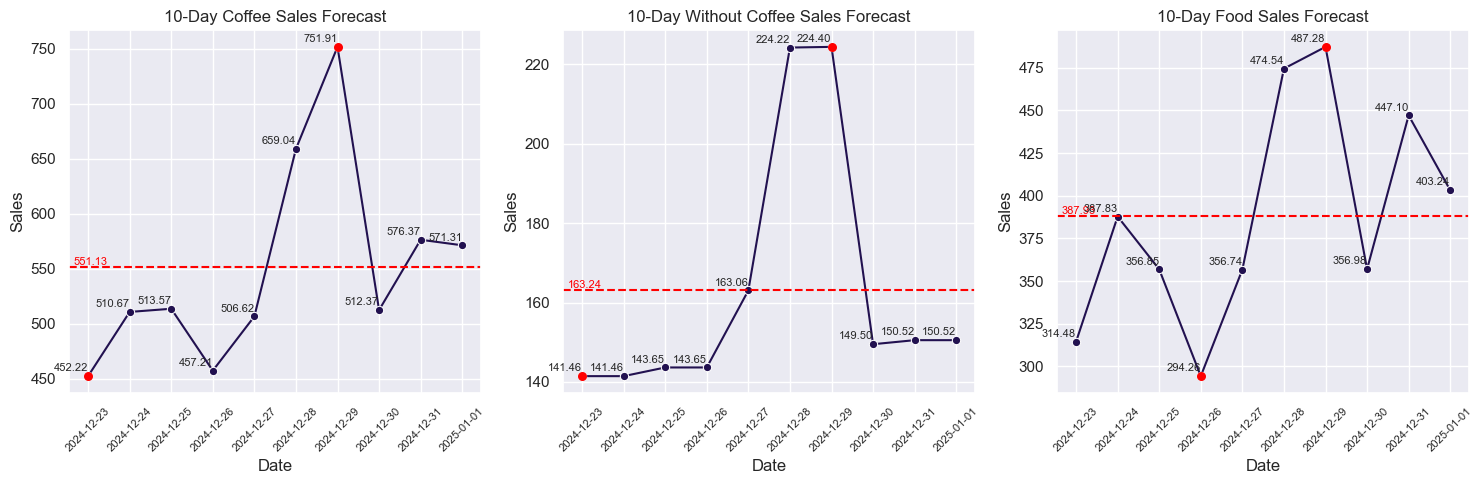

In [28]:
categories = ['Coffee', 'Without Coffee', 'Food']
vs.plot_sales(coffee_predictions, without_coffee_predictions, food_predictions, categories)

Mean Total Sales: 1102.30
Min Total Sales: 895.12 on 2024-12-26
Max Total Sales: 1463.58 on 2024-12-29




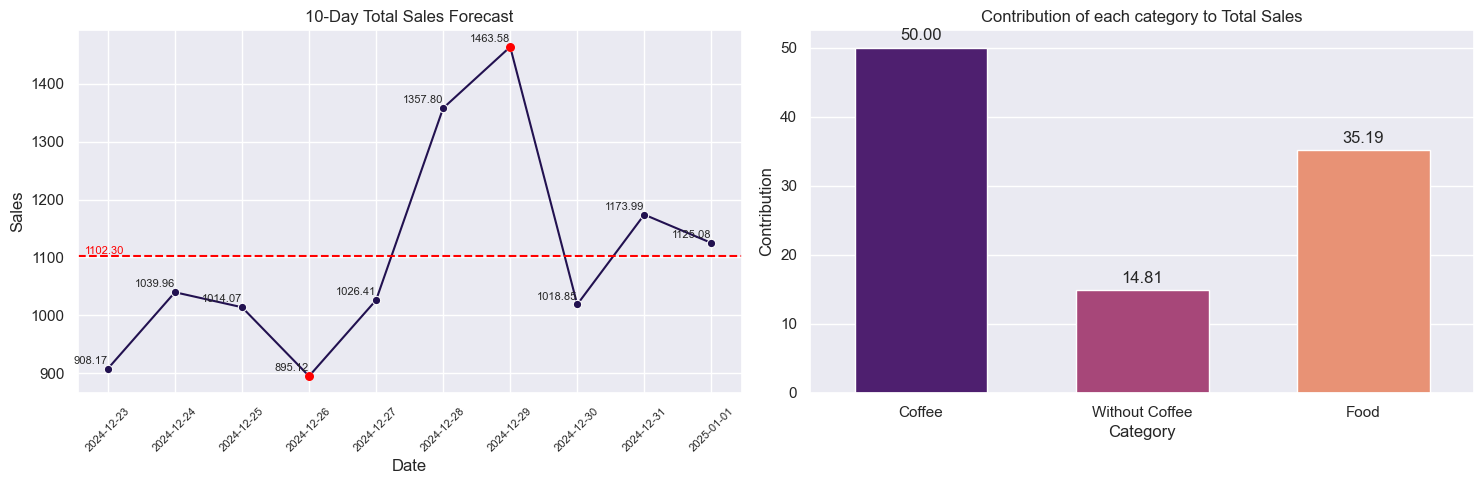

In [29]:
total_predictions = coffee_predictions + without_coffee_predictions + food_predictions
coffee_contribution = round(coffee_predictions['sales'].sum() / total_predictions['sales'].sum() * 100, 2)
without_coffee_contribution = round(without_coffee_predictions['sales'].sum() / total_predictions['sales'].sum() * 100, 2)
food_contribution = round(food_predictions['sales'].sum() / total_predictions['sales'].sum() * 100, 2)

vs.plot_total_sales(total_predictions, coffee_contribution, without_coffee_contribution, food_contribution)